In [16]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler





# Load Data and check for missing values

In [17]:
# load the data into a pandas dataframe

data_path = 'Churn2.csv'
df = pd.read_csv(data_path)

# preview data
df.info()
df.head
print(df)

# total count of NaN values
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

# Preprocess Data


*   Drop unnecessary variables
*   Convert target to numeric




In [18]:
# drop unnecessary columns
churn_data = df['Churn?']
df.drop(['State', 'Area Code', 'Phone','Churn?'], axis=1, inplace=True)
# convert plan variables to numerical
df["Int'l Plan"] = df["Int'l Plan"].apply(lambda x: 1 if x == 'yes' else 0)
df['VMail Plan'] = df['VMail Plan'].apply(lambda x: 1 if x == 'yes' else 0)

df.head()



,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Scale Data

In [19]:
#Standardize Data
dfcolumns = df.columns.values.tolist()

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dfcolumns)


df_scaled.head()



,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,0.676489,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.149065,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.902529,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,-0.428590,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,-0.654629,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641


How Many Clusters

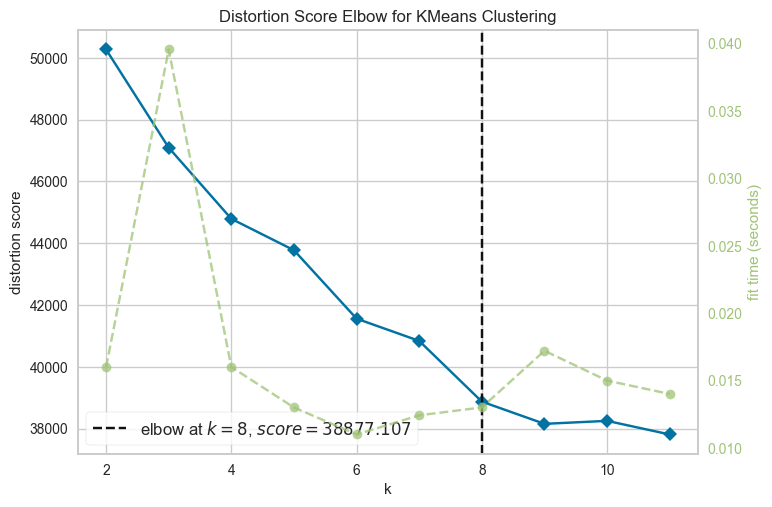

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(df_scaled)
visualizer.show()

Generate and Visualize Clusters

In [21]:
kmeans = KMeans(n_clusters=5, random_state=904)
kmclus=kmeans.fit(df_scaled)

clusters = kmeans.fit_predict(df_scaled)

#append cluster to original data
df['cluster']=clusters

df.info()

print(df['cluster'].value_counts())

df_desc = df.groupby('cluster').mean()
print(df_desc)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   Int'l Plan      3333 non-null   int64  
 2   VMail Plan      3333 non-null   int64  
 3   VMail Message   3333 non-null   int64  
 4   Day Mins        3333 non-null   float64
 5   Day Calls       3333 non-null   int64  
 6   Day Charge      3333 non-null   float64
 7   Eve Mins        3333 non-null   float64
 8   Eve Calls       3333 non-null   int64  
 9   Eve Charge      3333 non-null   float64
 10  Night Mins      3333 non-null   float64
 11  Night Calls     3333 non-null   int64  
 12  Night Charge    3333 non-null   float64
 13  Intl Mins       3333 non-null   float64
 14  Intl Calls      3333 non-null   int64  
 15  Intl Charge     3333 non-null   float64
 16  CustServ Calls  3333 non-null   int64  
 17  cluster         3333 non-null   i

Profile Clusters

International Charges


<Figure size 800x400 with 0 Axes>

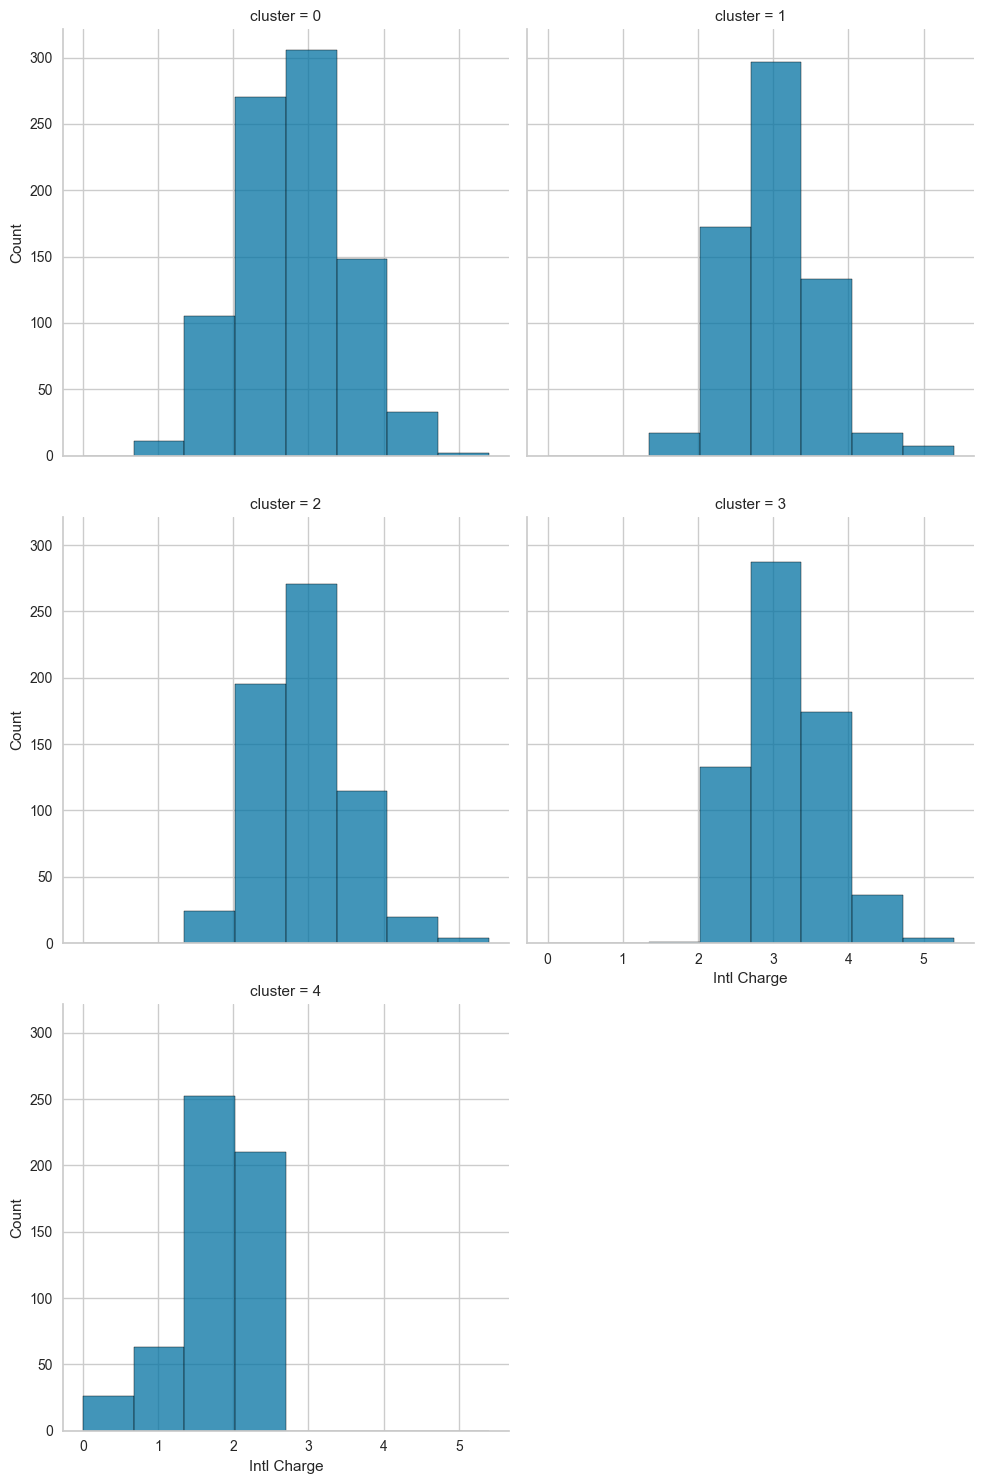

In [22]:
#day charge eve charge night charge Intl min
plt.figure(figsize=(8,4))
print("International Charges")
sns.displot(data=df, x="Intl Charge", bins=8, col='cluster', col_wrap=2, common_bins=True)
plt.show()





In [23]:
df.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,cluster
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,2
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,3


Churn?


<Figure size 800x400 with 0 Axes>

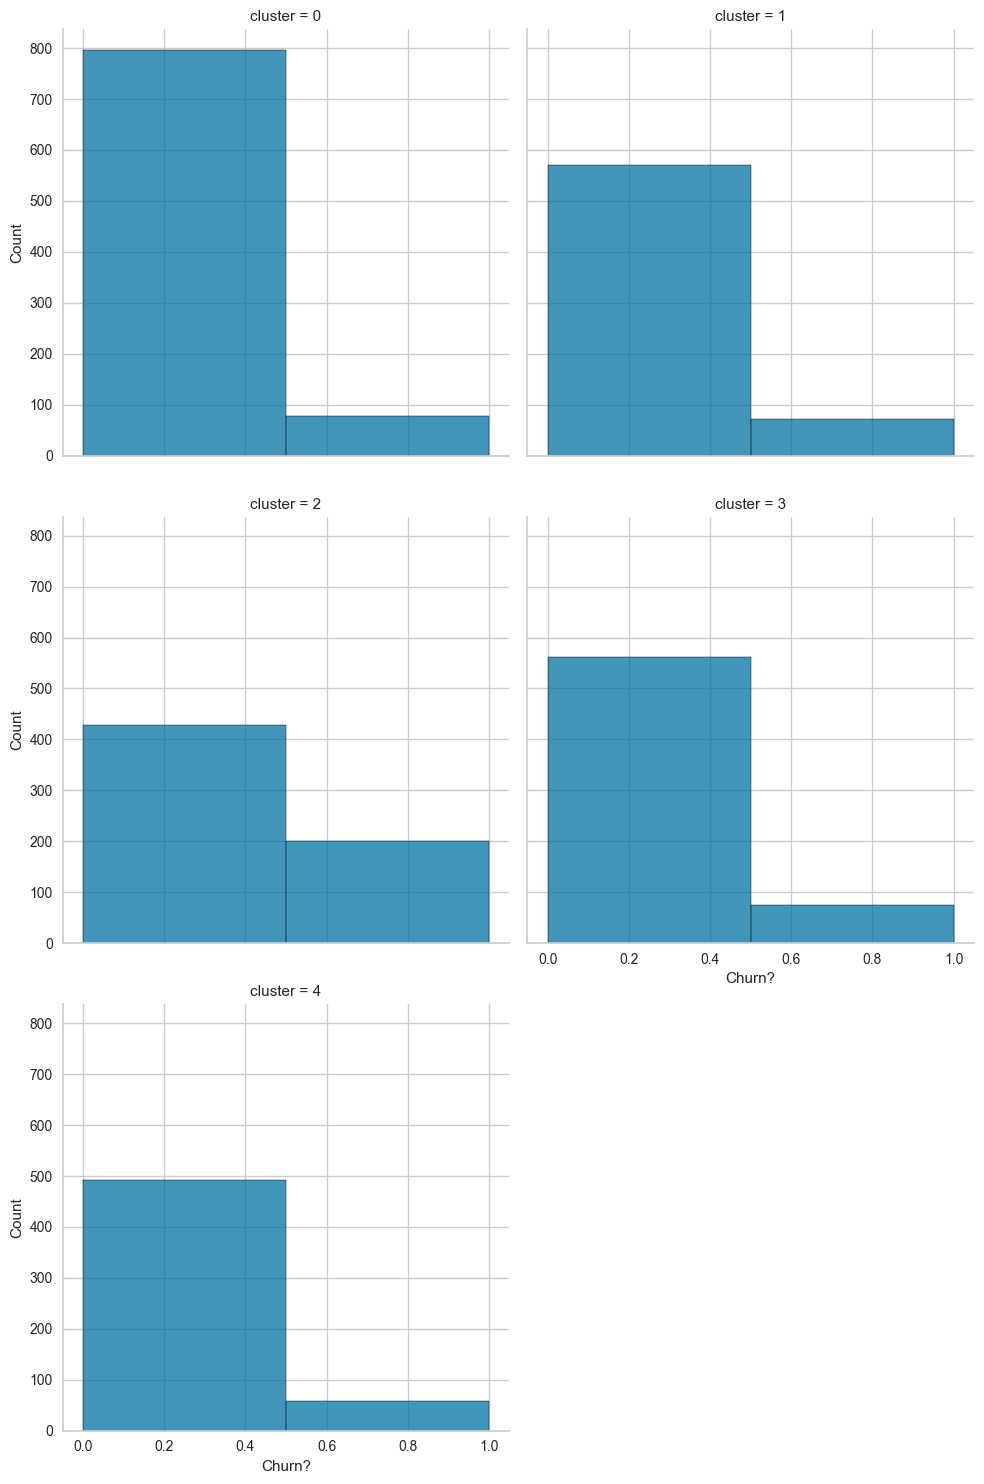

In [25]:
#day charge eve charge night charge Intl min
plt.figure(figsize=(8,4))
print("Churn?")
df["Churn?"] = churn_data
sns.displot(data=df, x="Churn?", bins=2, col='cluster', col_wrap=2, common_bins=True)
plt.show()





In [12]:
dfday = df[['Day Charge', 'cluster']]
dfeve = df[['Eve Charge', 'cluster']]
dfnight = df[['Night Charge','cluster']]
dfintl = df[['Intl Charge', 'cluster']]

df_desc1 = dfday.groupby('cluster').describe()
print(df_desc1)

df_desc2 = dfeve.groupby('cluster').describe()
print(df_desc2)

df_desc3 = dfnight.groupby('cluster').describe()
print(df_desc3)

df_desc4 = dfintl.groupby('cluster').describe()
print(df_desc4)

        Day Charge                                                         
             count       mean       std    min     25%    50%    75%    max
cluster                                                                    
0            875.0  30.747143  8.978461   0.44  24.635  30.96  36.92  54.81
1            643.0  23.058258  6.814009   0.00  18.675  24.36  28.05  36.92
2            629.0  40.452878  5.874392  28.82  35.920  39.58  44.27  59.64
3            635.0  28.154142  7.216577   4.59  23.215  28.53  32.92  46.63
4            551.0  30.510381  7.295081   9.71  25.290  30.60  35.54  53.48
        Eve Charge                                                        
             count       mean       std   min    25%    50%     75%    max
cluster                                                                   
0            875.0  17.264400  4.184283  3.59  14.25  17.34  20.110  30.75
1            643.0  19.678258  3.698406  9.72  17.19  19.59  22.255  30.91
2            629.